In [1]:
import matplotlib.pyplot as plt
from plots.mpltoolkit import mpl_loc, named_colors, markers, fancy_legend, load_style_sheet
import numpy as np
import vice
import sys
load_style_sheet("papers")
print(sys.version_info)

sys.version_info(major=3, minor=12, micro=3, releaselevel='final', serial=0)


/Users/jamesjohnson/Work/Research/lib/public-dev/VICE/vice/__init__.py:141: UserWarning: Using un-released version of VICE
  warnings.warn("Using un-released version of VICE", UserWarning)


In [13]:
output = vice.output("../outputs/river/test")

In [14]:
output.zones["zone0"].history["ifr"][:20]

[nan,
 0.0241534,
 0.01429579,
 0.01208673,
 0.01088172,
 0.01009252,
 0.009526142,
 0.009096482,
 0.008758179,
 0.008484626,
 0.008258994,
 0.00807002,
 0.007909834,
 0.007772735,
 0.00765448,
 0.00755183,
 0.007462265,
 0.007383789,
 0.007314797,
 0.007253981]

In [26]:
def get_velocity_profile(output, lookback):
    raw = np.genfromtxt("%s_gasvelocities.out" % (output.name))
    time = output.zones["zone0"].history["time"][-1] - lookback
    diff = [abs(_ - time) for _ in output.zones["zone0"].history["time"]]
    idx = diff.index(min(diff))
    time = output.zones["zone0"].history["time"][idx]
    # print(time)
    radii = []
    vgas = []
    for i in range(len(raw)):
        if raw[i][0] == time:
            radii.append(raw[i][1])
            vgas.append(raw[i][2])
        else: pass
    return [radii, vgas]

def mu(output, lookback, zone_width = 0.1):
    radii, vgas = get_velocity_profile(output, lookback)
    diff = [abs(_ - lookback) for _ in output.zones["zone0"].history["lookback"]]
    idx = diff.index(min(diff))
    mu_gas = []
    mu_oxygen = []
    for i in range(len(radii) - 1):
        zone = output.zones["zone%d" % (i)]
        neighbor = output.zones["zone%d" % (i + 1)]
        if radii[i + 1] >= 15.5:
            mu_gas.append(float("nan"))
            mu_oxygen.append(float("nan"))
        else:
            tau_star = zone.history["mgas"][idx] / zone.history["sfr"][idx] * 1.e-9
            mu = (neighbor.history["mgas"][idx] - zone.history["mgas"][idx]) / (zone.history["mgas"][idx] * zone_width)
            mu += (vgas[i + 1] - vgas[i]) / (vgas[i] * zone_width)
            mu *= -tau_star * vgas[i]
            mu_gas.append(mu)
            mu -= tau_star * vgas[i] * (
                neighbor.history["z(o)"][idx] - zone.history["z(o)"][idx]) / (zone.history["z(o)"][idx] * zone_width)
            mu_oxygen.append(mu)
    return [radii, mu_gas, mu_oxygen]

0 0.0
1 0.0
2 0.0
3 0.0
4 0.0
5 0.0
6 0.0
7 0.0
8 0.0
9 0.0
10 0.0
11 0.0
12 0.0
13 0.0
14 0.0
15 0.0
16 0.0
17 0.0
18 0.0
19 0.0
20 0.0
21 0.0
22 0.0
23 0.0
24 0.0
25 0.0
26 0.0
27 0.0
28 0.0
29 0.0
30 0.0
31 0.0
32 0.0
33 0.0
34 0.0
35 0.0
36 0.0
37 0.0
38 0.0
39 0.0
40 0.0
41 0.0
42 0.0
43 0.0
44 0.0
45 0.0
46 0.0
47 0.0
48 0.0
49 0.0
50 0.0
51 0.0
52 0.0
53 0.0
54 0.0
55 0.0
56 0.0
57 0.0
58 0.0
59 0.0
60 0.0
61 0.0
62 0.0
63 0.0
64 0.0
65 0.0
66 0.0
67 0.0
68 0.0
69 0.0
70 0.0
71 0.0
72 0.0
73 0.0
74 0.0
75 0.0
76 0.0
77 0.0
78 0.0
79 0.0
80 0.0
81 0.0
82 0.0
83 0.0
84 0.0
85 0.0
86 0.0
87 0.0
88 0.0
89 0.0
90 0.0
91 0.0
92 0.0
93 0.0
94 0.0
95 0.0
96 0.0
97 0.0
98 0.0
99 0.0
100 0.0
101 0.0
102 0.0
103 0.0
104 0.0
105 0.0
106 0.0
107 0.0
108 0.0
109 0.0
110 0.0
111 0.0
112 0.0
113 0.0
114 0.0
115 0.0
116 0.0
117 0.0
118 0.0
119 0.006713005
120 0.006199395
121 0.0
122 0.0
123 0.0
124 0.0
125 0.0
126 0.0
127 0.0
128 0.0
129 0.006362186
130 0.003900116
131 0.0
132 0.0
133 0.0
134 0.

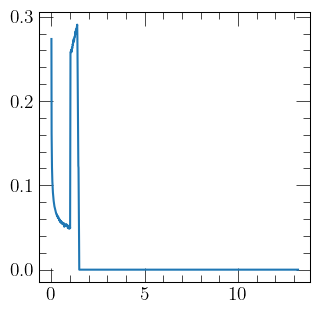

In [16]:
for i in range(155):
    print(i, output.zones["zone%d" % (i)].history["ifr"][-1])

# print(output.zones["zone0"].history["ifr"][:20])
plt.plot(output.zones["zone80"].history["time"], output.zones["zone80"].history["ifr"])

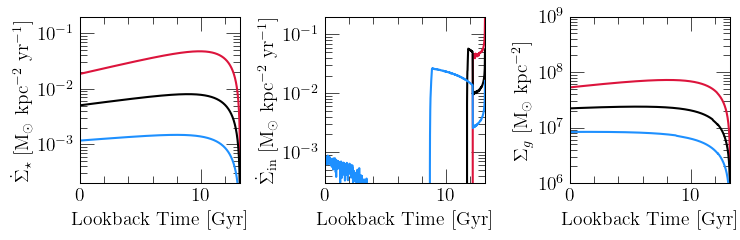

In [17]:
# RADII = [3, 5, 7, 9, 11, 13, 15]
# COLORS = ["crimson", "darkorange", "gold", "green", "blue", "darkviolet", "black"]
RADII = [4, 8, 12]
COLORS = ["crimson", "black", "dodgerblue"]
XLIM = 3 * [[0, 13.2]]
YLIM = [[2.e-4, 0.2], [3.e-4, 0.2], [1.e6, 1.e9]]

fig = plt.figure(figsize = (7.5, 2.5))
axes = 3 * [None]
for i in range(3):
    axes[i] = fig.add_subplot(131 + i)
    axes[i].set_xlabel(r"Lookback Time [Gyr]", fontsize = 14)
    axes[i].set_yscale("log")
    axes[i].set_xlim(XLIM[i])
    axes[i].set_ylim(YLIM[i])
axes[0].set_ylabel(r"$\dot\Sigma_\star$ [M$_\odot$ kpc$^{-2}$ yr$^{-1}$]", fontsize = 14)
axes[1].set_ylabel(r"$\dot\Sigma_\text{in}$ [M$_\odot$ kpc$^{-2}$ yr$^{-1}$]", fontsize = 14)
axes[2].set_ylabel(r"$\Sigma_g$ [M$_\odot$ kpc$^{-2}$]", fontsize = 14)

def plot_evolution_at_fixed_radius(output, radius, zone_width = 0.1, **kwargs):
    zone = output.zones["zone%d" % (int(radius / zone_width))]
    area = np.pi * ((radius + zone_width)**2 - radius**2)
    lookback = zone.history["lookback"]
    sigma_in = [ifr / area for ifr in zone.history["ifr"]]
    sigma_sfr = [sfr / area for sfr in zone.history["sfr"]]
    sigma_gas = [mgas / area for mgas in zone.history["mgas"]]
    axes[0].plot(lookback, sigma_sfr, **kwargs)
    axes[1].plot(lookback, sigma_in, **kwargs)
    axes[2].plot(lookback, sigma_gas, **kwargs)

for i in range(len(RADII)):
    kwargs = {
        "c": named_colors()[COLORS[i]],
        "label": r"$%g$ kpc" % (RADII[i])
    }
    plot_evolution_at_fixed_radius(output, RADII[i], **kwargs)

plt.tight_layout()
plt.show()

/var/folders/26/nqb98q9x5_q6brmqy4v21dqm0000gp/T/ipykernel_84846/3326247687.py:32: RuntimeWarning: divide by zero encountered in scalar divide
  mu += (vgas[i + 1] - vgas[i]) / (vgas[i] * zone_width)
/var/folders/26/nqb98q9x5_q6brmqy4v21dqm0000gp/T/ipykernel_84846/3326247687.py:33: RuntimeWarning: invalid value encountered in scalar multiply
  mu *= -tau_star * vgas[i]


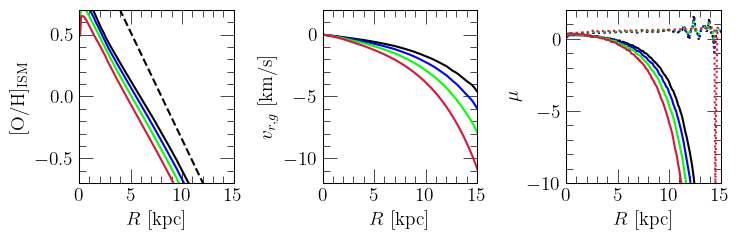

In [30]:
LOOKBACK = [0, 2, 4, 6]
COLORS = ["black", "blue", "lime", "crimson"]

fig = plt.figure(figsize = (7.5, 2.5))
ax1 = fig.add_subplot(131)
ax1.set_xlabel(r"$R$ [kpc]")
ax1.set_ylabel(r"[O/H]$_\text{ISM}$")
ax1.set_xlim([0, 15])
ax1.set_xticks([0, 5, 10, 15])
ax1.set_ylim([-0.7, 0.7])

ax2 = fig.add_subplot(132)
ax2.set_xlabel(r"$R$ [kpc]")
ax2.set_ylabel(r"$v_{r,g}$ [km/s]")
ax2.set_xlim([0, 15])
# ax2.set_yscale("log")
ax2.set_xticks([0, 5, 10, 15])
ax2.set_ylim([-12, 2])

ax3 = fig.add_subplot(133)
ax3.set_xlabel(r"$R$ [kpc]")
ax3.set_ylabel(r"$\mu$")
ax3.set_xlim([0, 15])
# ax3.set_ylim([-5, 5])
ax3.set_ylim([-10, 2])
# ax3.set_yscale("log")
ax3.set_xticks([0, 5, 10, 15])

def plot_ism_metallicity_snapshot(output, lookback, zone_width = 0.1, **kwargs):
    diff = [abs(_ - lookback) for _ in output.zones["zone0"].history["lookback"]]
    idx = diff.index(min(diff))
    # radii = np.arange(0, 15, zone_width)
    radii, vgas = get_velocity_profile(output, lookback)
    _, mu_gas, mu_oxygen = mu(output, lookback)
    # print(mu)
    # print(radii)
    oh_ism = []
    for i in range(len(radii)):
        oh_ism.append(output.zones["zone%d" % (i)].history["[o/h]"][idx])
    ax1.plot(radii, oh_ism, **kwargs)
    ax2.plot(radii, vgas, **kwargs)
    ax3.plot(radii[:-1], mu_oxygen, **kwargs)
    ax3.plot(radii[:-1], mu_gas, linestyle = ":", **kwargs)

# plot_ism_metallicity_snapshot(output, 0, c = named_colors()["black"])
for i in range(len(LOOKBACK)):
    kwargs = {
        "c": named_colors()[COLORS[i]]
    }
    plot_ism_metallicity_snapshot(output, LOOKBACK[i], **kwargs)

xvals = np.linspace(ax1.get_xlim()[0], ax1.get_xlim()[1], 100)
yvals = [-0.174 * (R - 8) for R in xvals] # analytic expectation of slope
ax1.plot(xvals, yvals, c = named_colors()["black"], linestyle = "--")

plt.tight_layout()
plt.show()